In [1]:
import networkx as nx

from openqaoa.problems import Knapsack
#Inner OpenQAOA function for ploting graphs
#plot_graph(graph)

# Create a MaximumCut instance from the graph and get its QUBO and hamiltonian
knapsack_prob = Knapsack(values=[9, 1, 1, 1, 9, 8, 6, 4, 6, 3],weights=[5, 6, 1, 1, 4, 1, 2, 6, 7, 6],weight_capacity=16,penalty=18)
print(knapsack_prob.problem_instance)
knapsack_qubo = knapsack_prob.qubo
knapsack_hamiltonian = knapsack_qubo.hamiltonian

{'problem_type': 'knapsack', 'values': [9, 1, 1, 1, 9, 8, 6, 4, 6, 3], 'weights': [5, 6, 1, 1, 4, 1, 2, 6, 7, 6], 'weight_capacity': 16, 'penalty': 18, 'n_items': 10}


In [2]:
from tqdm import tqdm
from openqaoa.backends import create_device
from openqaoa import QAOA
from openqaoa.utilities import ground_state_hamiltonian
import matplotlib.pyplot as plt

q1 = QAOA()
#qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
qiskit_device = create_device(location='ibmq', name='ibmq_qasm_simulator')
q1.set_device(qiskit_device)
q1.set_circuit_properties(p=3, param_type='standard_w_bias', init_type='ramp', mixer_hamiltonian='x')
q1.set_backend_properties(n_shots=20000, seed_simulator=1)
q1.set_classical_optimizer(method='Nelder-Mead', maxiter=150,
optimization_progress=True, cost_progress=True, parameter_log=True)
q1.compile(knapsack_qubo)


In [3]:
q1.optimize()
correct_solution1 = ground_state_hamiltonian(q1.cost_hamil)
print(correct_solution1)
opt_results1 = q1.result

(-34.0, ['01001011111000'])


states kept: 40


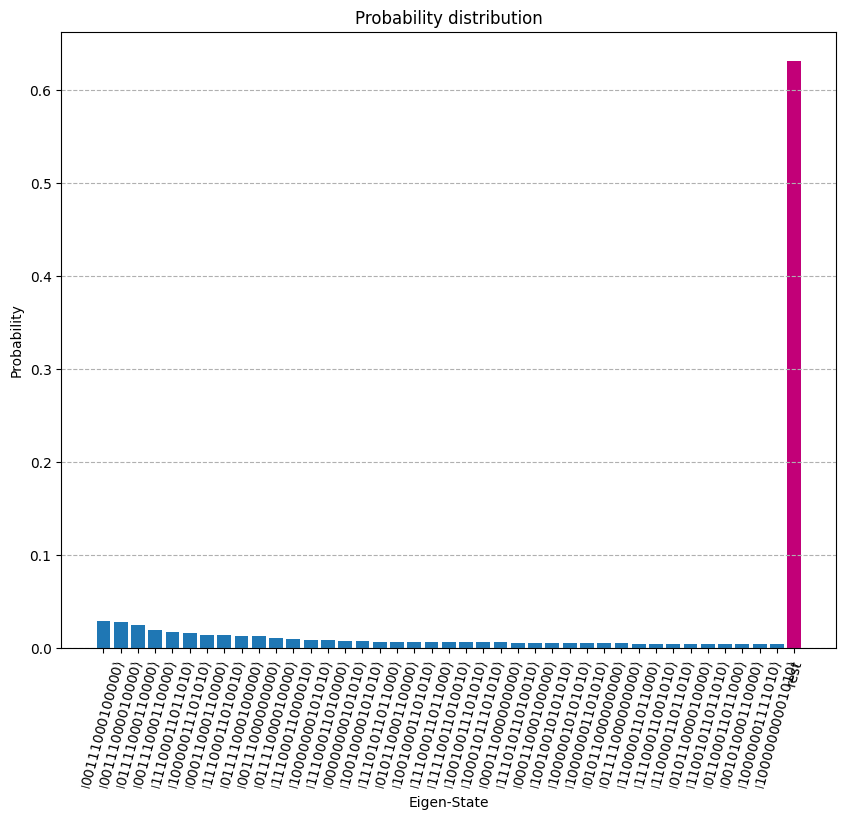

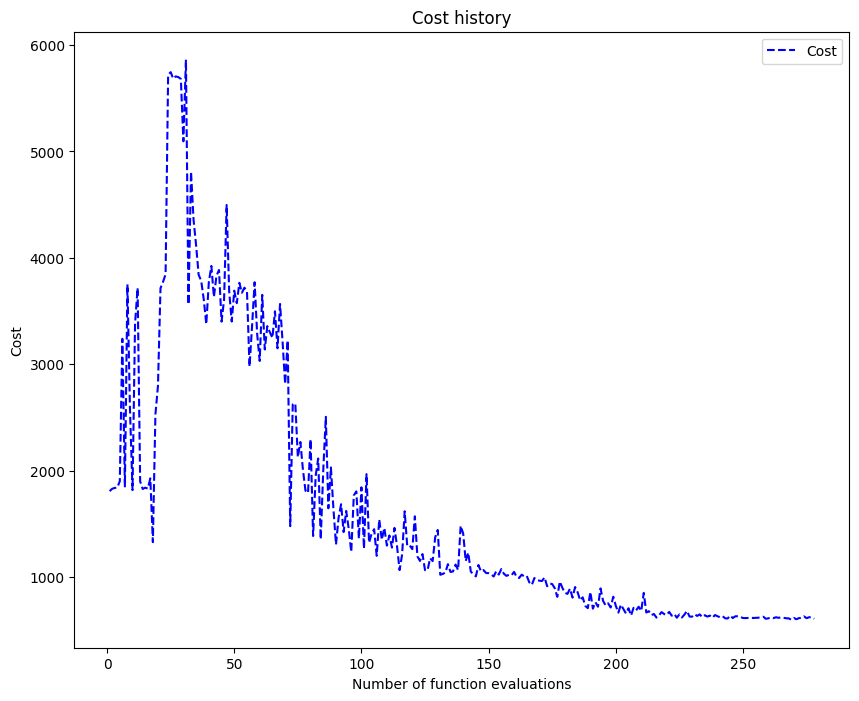

In [4]:
opt_results1.plot_probabilities()
opt_results1.plot_cost()

In [31]:
costs = opt_results1.intermediate['cost']

best_cost=100000
best_itr = -1
for i in range(len(costs)):
    if costs[i]<best_cost:
        best_cost=costs[i]
        best_itr = i
print(costs)
print()
print('best cost ',best_cost)
print('best itr ',best_itr)
best_angles = opt_results1.intermediate['angles'][best_itr]
print('best angles ',best_angles)


[1801.287250000003, 3337.391374999998, 4078.17725000001, 4272.037874999998, 2912.8465, 2438.965875000004, 1884.243875000004, 2844.205000000006, 3217.235000000008, 4803.845500000018, 1953.757250000007, 3466.801875000008, 4073.770625000005, 3685.08474999999, 4871.058375000005, 3967.567875000001, 3539.142500000004, 3444.695125000008, 3693.83362500001, 3906.127874999995, 3164.814000000004, 1848.104000000002, 4740.413250000011, 3594.285250000007, 3654.495749999992, 3639.934500000004, 5679.95337499999, 2333.156750000002, 2311.659750000007, 3797.453000000005, 3797.068374999997, 1863.676875000004, 3643.383749999994, 1984.171500000004, 4770.806125000003, 3826.082500000002, 3378.182, 1946.229000000003, 2994.724750000002, 6369.842499999993]

best cost  1801.287250000003
best itr  0
best angles  [0.583333333333, 0.35, 0.116666666667, 0.116666666667, 0.35, 0.583333333333]


In [ ]:
[0.583333333333, 0.35, 0.116666666667, 0.116666666667, 0.35, 0.583333333333]

In [33]:
dict = q1.evaluate_circuit(best_angles)

In [57]:
dict

{'cost': 1832.574299999998,
 'uncertainty': 2790.49055604557,
 'measurement_results': {'11101001001010': 1,
  '01111100100111': 1,
  '00000110001001': 1,
  '10110011011111': 1,
  '00100001111101': 1,
  '01100011111100': 1,
  '10100110101111': 1,
  '11101000100100': 1,
  '00101111111001': 1,
  '01011011111111': 1,
  '10000010010101': 1,
  '00101110111110': 1,
  '11111100110010': 1,
  '11110001010110': 1,
  '00000010010011': 1,
  '01111010111001': 1,
  '11001010011010': 1,
  '00101010010001': 1,
  '00011011100111': 1,
  '10110010110001': 1,
  '11010101100011': 1,
  '00110000001010': 1,
  '11001001100100': 1,
  '10010011000001': 1,
  '01101001011101': 1,
  '11011001111101': 1,
  '10111100101101': 1,
  '01110101001110': 1,
  '11101111000010': 1,
  '11001011110100': 2,
  '00111000011000': 1,
  '11101001011100': 1,
  '11011001111111': 1,
  '00000011001110': 1,
  '00001010010110': 2,
  '01100010101000': 1,
  '10111011110001': 1,
  '10010001110100': 1,
  '00010110011000': 1,
  '00111010101010'

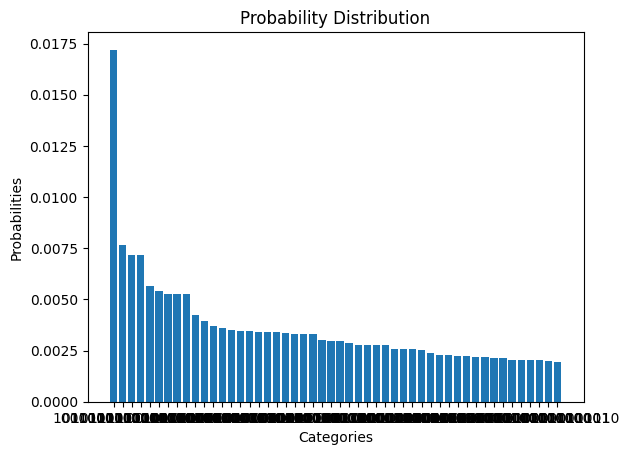

In [56]:
dict_probs = dict['measurement_results']
sorted_dict = {k: v for k, v in sorted(dict_probs.items(), key=lambda item: item[1],reverse=True)}

#print(sorted_dict)
labels = list(sorted_dict.keys())[0:50]
values = list(sorted_dict.values())[0:50]

values = [value / 20000 for value in values]
plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Probabilities')
plt.title('Probability Distribution')
plt.show()

In [ ]:
{'problem_type': 'knapsack', 'values': [9, 1, 1, 1, 9, 8, 6, 4, 6, 3], 'weights': [5, 6, 1, 1, 4, 1, 2, 6, 7, 6], 'weight_capacity': 16, 'penalty': 18, 'n_items': 10}

In [ ]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account('825a8b2e6fb861f63088f866e59357e49447b4b9b24ff6136e56dcc28f2fb0cedda6c2976b9e2aef48129a80864265494be7f8a7aae5b9ebd6654a7d80d9b5cb')

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1885.08it/s]


params = 3-standard-rand-x-Nelder-Mead
itr  1
params = 3-standard-rand-x-Powell
itr  2
params = 3-standard-rand-x-COBYLA
itr  3






100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 477.90it/s]


params = 3-standard-rand-xy-Nelder-Mead
itr  4
params = 3-standard-rand-xy-Powell
itr  5
params = 3-standard-rand-xy-COBYLA
itr  6





  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3938.31it/s]


params = 3-standard-ramp-x-Nelder-Mead
itr  7
params = 3-standard-ramp-x-Powell
itr  8
params = 3-standard-ramp-x-COBYLA
itr  9






100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 77.05it/s]


params = 3-standard-ramp-xy-Nelder-Mead
itr  10
params = 3-standard-ramp-xy-Powell
itr  11
params = 3-standard-ramp-xy-COBYLA
itr  12




  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


params = 3-standard_w_bias-rand-x-Nelder-Mead
itr  13
params = 3-standard_w_bias-rand-x-Powell
itr  14
params = 3-standard_w_bias-rand-x-COBYLA
itr  15






100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 148.79it/s]


params = 3-standard_w_bias-rand-xy-Nelder-Mead
itr  16
params = 3-standard_w_bias-rand-xy-Powell
itr  17
params = 3-standard_w_bias-rand-xy-COBYLA
itr  18





  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


params = 3-standard_w_bias-ramp-x-Nelder-Mead
itr  19
params = 3-standard_w_bias-ramp-x-Powell
itr  20
params = 3-standard_w_bias-ramp-x-COBYLA
itr  21






100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 60.02it/s]


params = 3-standard_w_bias-ramp-xy-Nelder-Mead
itr  22
params = 3-standard_w_bias-ramp-xy-Powell
itr  23
params = 3-standard_w_bias-ramp-xy-COBYLA
itr  24




  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 3-annealing-rand-x-Nelder-Mead
itr  25
(-34.0, ['01001011111000'])






 33%|██████████████████████████                                                    | 1/3 [1:27:30<2:55:00, 5250.36s/it]

params = 3-annealing-rand-x-Powell
itr  26






 67%|█████████████████████████████████████████████████████▎                          | 2/3 [2:04:54<58:01, 3481.80s/it]

(-34.0, ['01001011111000'])
params = 3-annealing-rand-x-COBYLA
itr  27






100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [2:09:09<00:00, 2008.41s/it]

(-34.0, ['01001011111000'])


100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [2:09:09<00:00, 2583.09s/it]



 50%|███████████████████████████████████████                                       | 1/2 [2:09:09<2:09:09, 7749.26s/it]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 3-annealing-rand-xy-Nelder-Mead
itr  28
(-34.0, ['01001011111000'])






 33%|██████████████████████████                                                    | 1/3 [2:04:01<4:08:03, 7441.63s/it]

params = 3-annealing-rand-xy-Powell
itr  29


(-34.0, ['01001011111000'])


 67%|█████████████████████████████████████████████████████▎                          | 2/3 [2:09:48<54:28, 3268.46s/it]

params = 3-annealing-rand-xy-COBYLA
itr  30
(-34.0, ['01001011111000'])






100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [2:16:46<00:00, 2735.52s/it]



100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [4:25:55<00:00, 7977.92s/it]


 50%|██████████████████████████████████████▌                                      | 1/2 [4:25:55<4:25:55, 15955.85s/it]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 3-annealing-ramp-x-Nelder-Mead
itr  31
(-34.0, ['01001011111000'])






 33%|██████████████████████████                                                    | 1/3 [1:15:14<2:30:29, 4514.98s/it]

params = 3-annealing-ramp-x-Powell
itr  32


(-34.0, ['01001011111000'])


 67%|████████████████████████████████████████████████████                          | 2/3 [2:24:48<1:11:54, 4314.25s/it]

params = 3-annealing-ramp-x-COBYLA
itr  33
(-34.0, ['01001011111000'])






100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [2:29:09<00:00, 2983.33s/it]



 50%|███████████████████████████████████████                                       | 1/2 [2:29:09<2:29:09, 8950.00s/it]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 3-annealing-ramp-xy-Nelder-Mead
itr  34


(-34.0, ['01001011111000'])


 33%|██████████████████████████                                                    | 1/3 [2:09:21<4:18:42, 7761.03s/it]

params = 3-annealing-ramp-xy-Powell
itr  35


C:\Users\Adriano\AppData\Local\Temp\ipykernel_8132\3593392513.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(7,4))




 67%|████████████████████████████████████████████████████                          | 2/3 [2:38:27<1:10:23, 4223.05s/it]

(-34.0, ['01001011111000'])


params = 3-annealing-ramp-xy-COBYLA
itr  36






100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [2:44:45<00:00, 3295.03s/it]



100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [5:13:55<00:00, 9417.55s/it]


100%|███████████████████████████████████████████████████████████████████████████████| 2/2 [9:39:50<00:00, 17649.53s/it]

(-34.0, ['01001011111000'])


100%|███████████████████████████████████████████████████████████████████████████████| 2/2 [9:39:50<00:00, 17395.48s/it]

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]



  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

params = 4-standard-rand-x-Nelder-Mead
itr  37
There was an error when trying to contact the IBMQ API.
There was an error when trying to contact the IBMQ API.
There was an error when trying to contact the IBMQ API.
There was an error when trying to contact the IBMQ API.
There was an error when trying to contact the IBMQ API.
Number of API Retries exceeded Maximum allowed. 

The optimization has been terminated early. Most likely due to a connection error.You can retrieve results from the optimization runs that were completedthrough the .result method.
(-34.0, ['01001011111000'])






 33%|███████████████████████████▎                                                      | 1/3 [22:42<45:24, 1362.46s/it]

params = 4-standard-rand-x-Powell
itr  38


 25%|██████████████████▊                                                        | 1/4 [10:02:36<30:07:49, 36156.64s/it]

An Exception has occured when trying to connect with the provider.Please note that you are required to set up your IBMQ account locally first.See: https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq for how to save your IBMQ account locally. 
 "HTTPSConnectionPool(host='auth.quantum-computing.ibm.com', port=443): Max retries exceeded with url: /api/version (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000117FEA4DBB0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))"


ValueError: The backend returned an error: Error connecting to IBMQ.

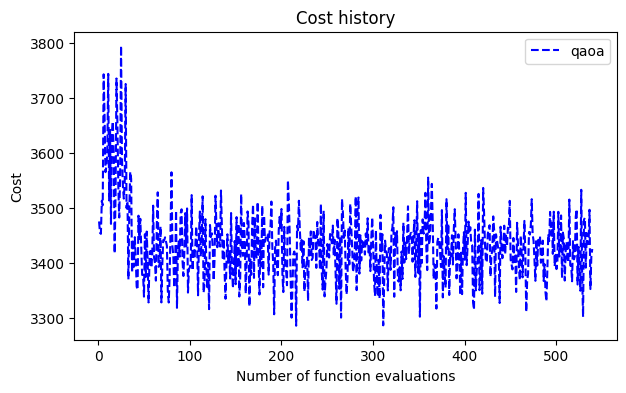

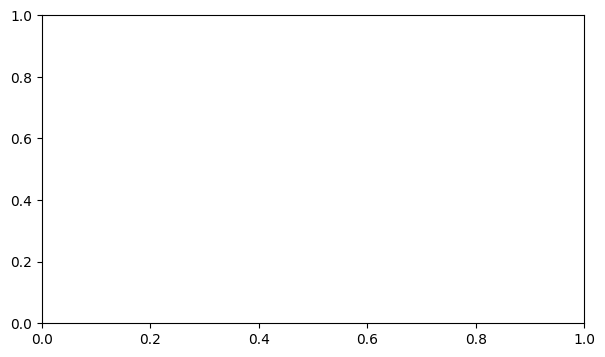

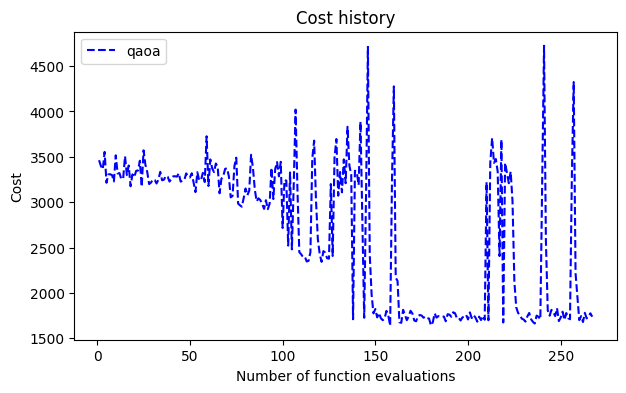

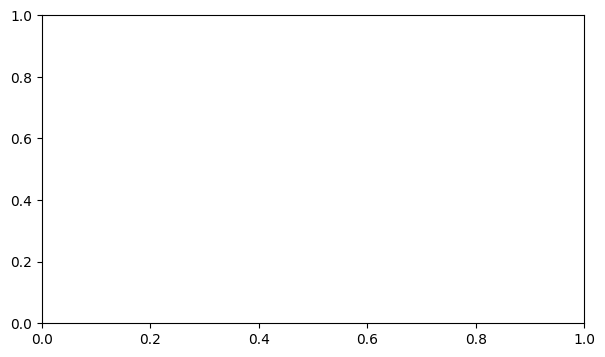

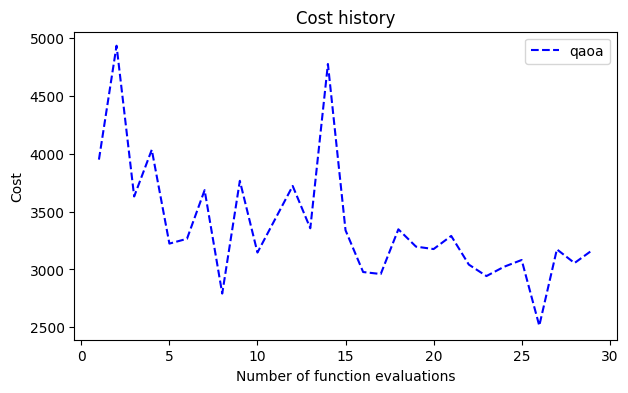

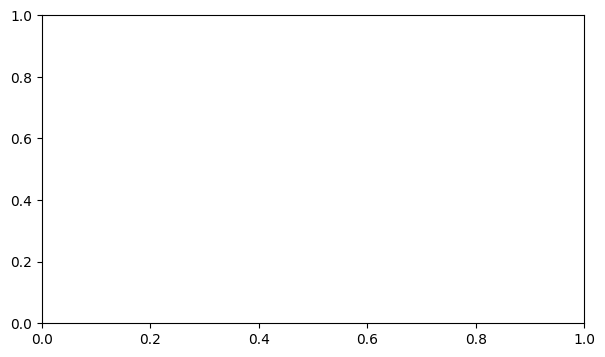

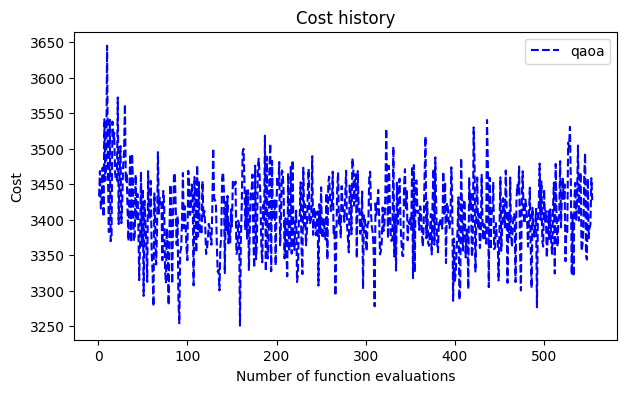

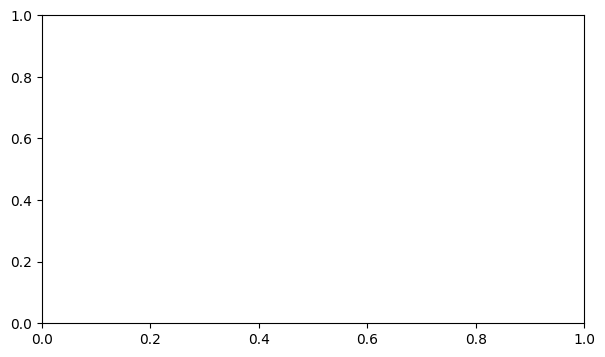

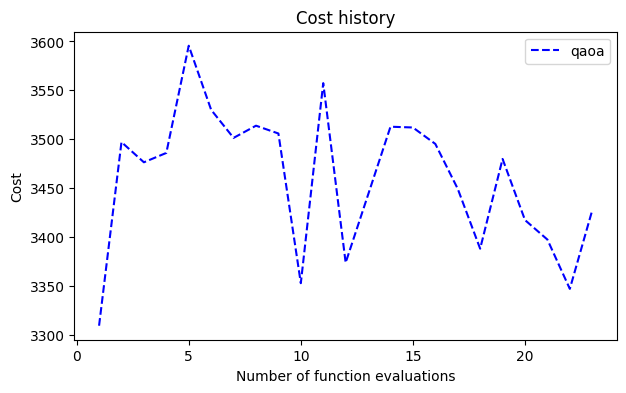

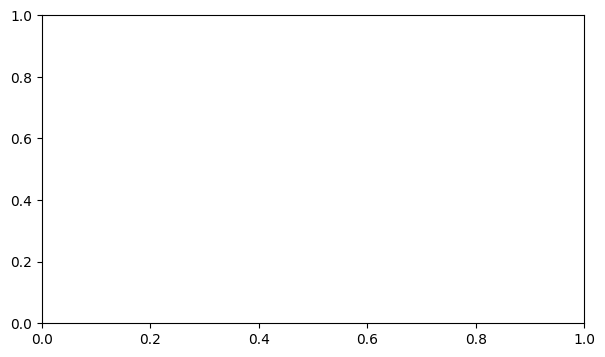

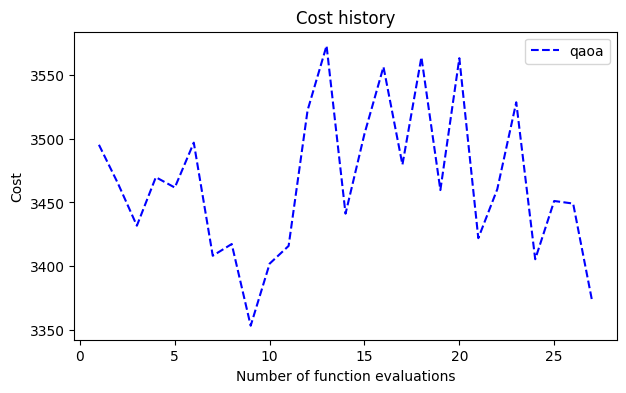

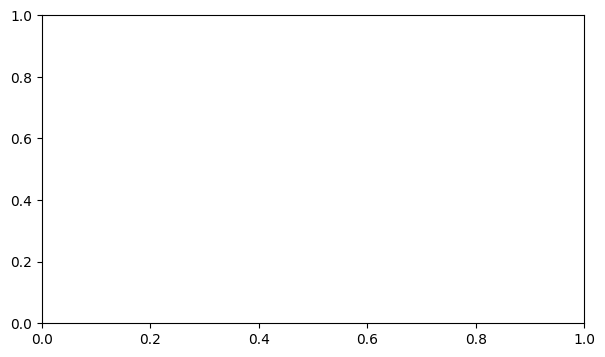

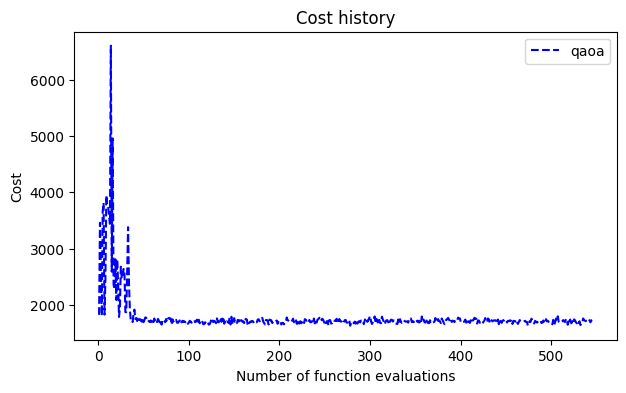

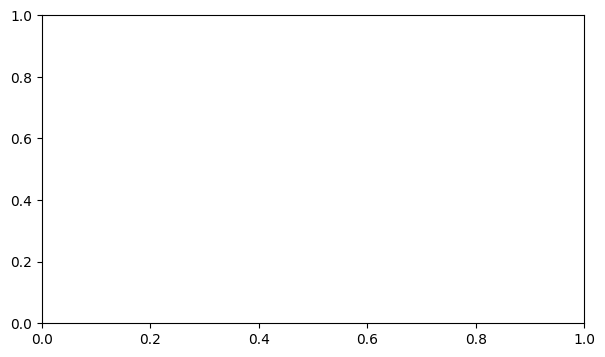

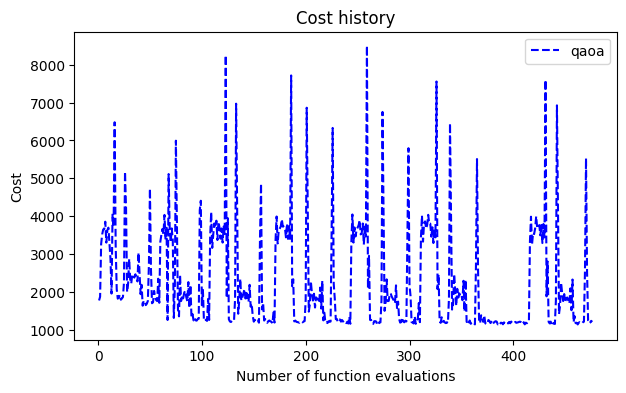

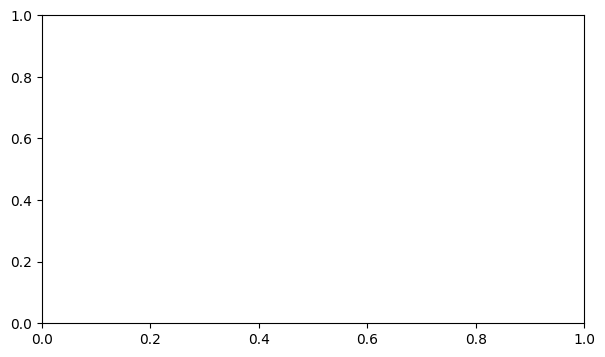

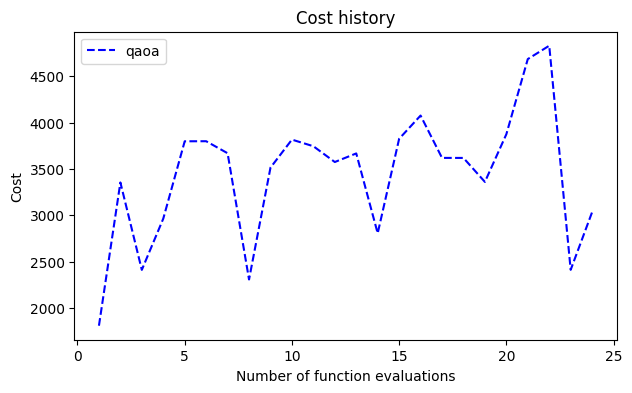

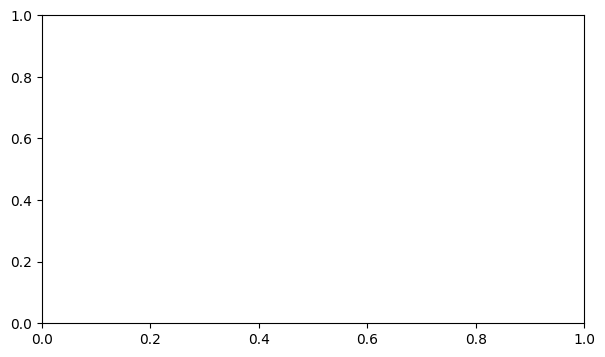

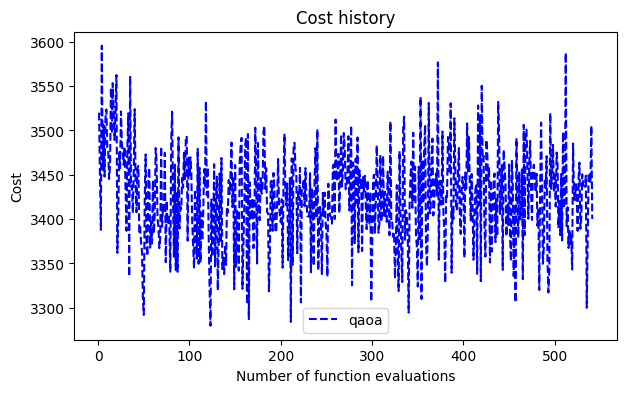

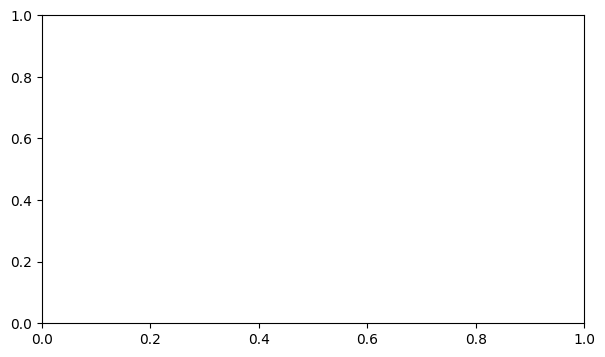

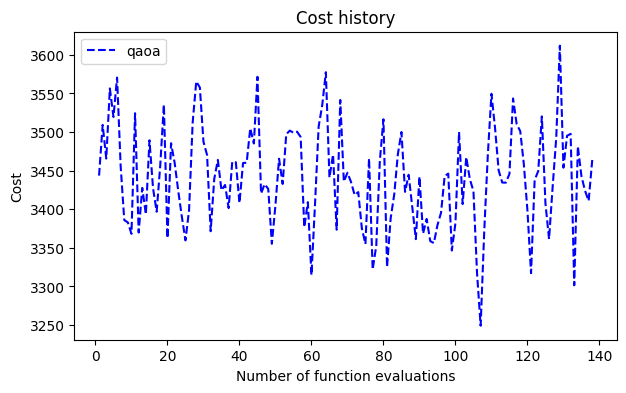

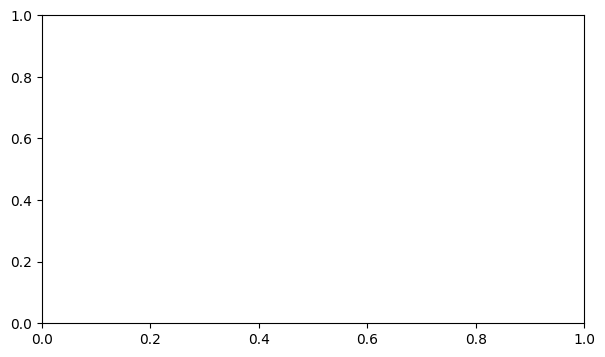

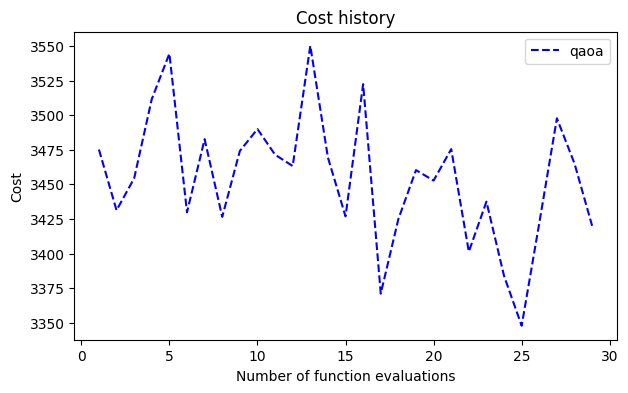

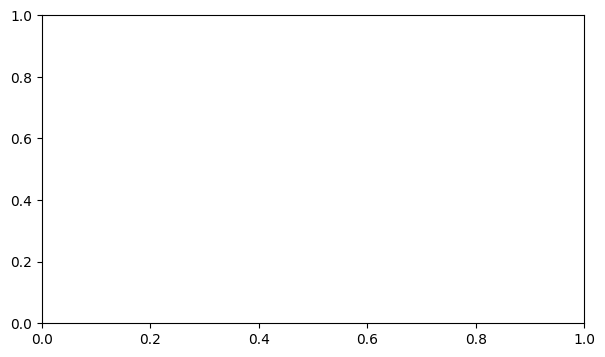

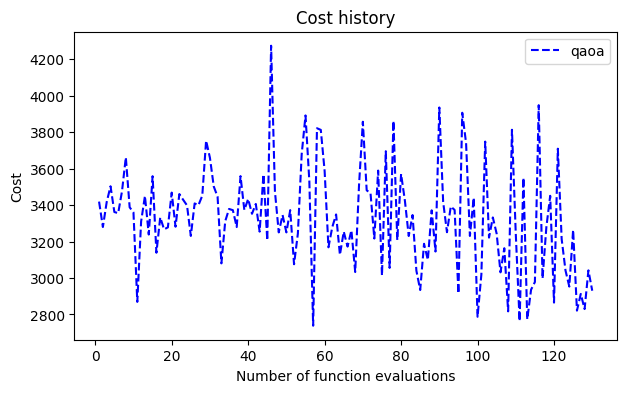

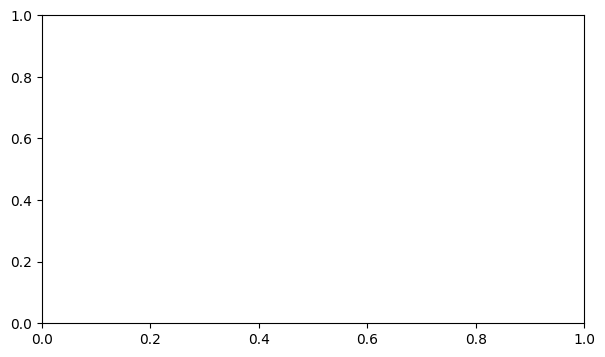

In [2]:
from tqdm import tqdm
from openqaoa.backends import create_device
from openqaoa import QAOA
from openqaoa.utilities import ground_state_hamiltonian
import matplotlib.pyplot as plt

itr = 0
yahice = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,36]
ps = [3, 4, 5, 6]
param_types = ["standard", "standard_w_bias", "annealing"]
init_types = ["rand", "ramp"]
mixer_hams = ["x", "xy"]
optimizers = ["Nelder-Mead", "Powell", "COBYLA"]
for p in tqdm(ps):
    for param_type in tqdm(param_types):
        for init_type in tqdm(init_types):
            for mixer_hamiltonian in tqdm(mixer_hams):
                for optimizer in tqdm(optimizers):
                    print("params = %s-%s-%s-%s-%s" % (str(p), str(param_type), str(init_type), str(mixer_hamiltonian), str(optimizer)))
                    itr = itr+1
                    print('itr ',itr)
                    if itr in yahice:
                        continue
                    
                    q1 = QAOA()
                    #qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
                    qiskit_device = create_device(location='ibmq', name='ibmq_qasm_simulator')
                    q1.set_device(qiskit_device)
                    q1.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
                    q1.set_backend_properties(n_shots=5000, seed_simulator=1)
                    q1.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,
                    optimization_progress=True, cost_progress=True, parameter_log=True)
                    q1.compile(knapsack_qubo)
                    q1.optimize()
                    correct_solution1 = ground_state_hamiltonian(q1.cost_hamil)
                    print(correct_solution1)
                    opt_results1 = q1.result
                    '''
                    noise_model = add_depolarizing_error(NoiseModel(),0.1)
                    q2 = QAOA()
                    qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
                    q2.set_device(qiskit_device)
                    q2.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
                    q2.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,
                                            optimization_progress=True, cost_progress=True, parameter_log=True)
                    q2.set_backend_properties(n_shots=5000, seed_simulator=1,
                                            noise_model=noise_model)
                    q2.compile(knapsack_qubo)
                    q2.optimize()
                    correct_solution2 = ground_state_hamiltonian(q2.cost_hamil)
                    opt_results2 = q2.result
                    print(correct_solution2)
                    qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
                    q3 = QAOA()
                    q3.set_device(qiskit_device)
                    q3.set_circuit_properties(p=p, param_type=param_type, init_type=init_type, mixer_hamiltonian=mixer_hamiltonian)
                    q3.set_classical_optimizer(method=optimizer, maxiter=200, tol=0.001,
                                            optimization_progress=True, cost_progress=True, parameter_log=True)
                    q3.set_backend_properties(n_shots=5000, seed_simulator=1, noise_model=noise_model)
                    q3.set_error_mitigation_properties(error_mitigation_technique='mitiq_zne',n_batches=64,calibration_data_location="caldata.json")
                    q3.compile(knapsack_qubo)
                    q3.optimize()
                    correct_solution3 = ground_state_hamiltonian(q3.cost_hamil)
                    print(correct_solution3)
                    opt_results3 = q3.result
                    '''
                    #plot_cost(opt_results2,)

                    fig, ax = plt.subplots(figsize=(7,4))
                    opt_results1.plot_cost(figsize=(7,4),color='blue',label='qaoa',ax=ax)
                    #opt_results2.plot_cost(figsize=(7,4),color='red',label='qaoa+noise',ax=ax)
                    #opt_results3.plot_cost(figsize=(7,4),color='green',label='qaoa+noise+zne',ax=ax)
                    plt.savefig("%s-%s-%s-%s-%s-1.png" % (str(p), str(param_type), str(init_type), str(mixer_hamiltonian), str(optimizer)))
                    fig2, ax2 = plt.subplots(figsize=(7,4))
                    #opt_results2.plot_cost(figsize=(7,4),color='red',label='qaoa+noise',ax=ax2)
                    #opt_results3.plot_cost(figsize=(7,4),color='green',label='qaoa+noise+zne',ax=ax2)
                    #plt.savefig("%s-%s-%s-%s-%s-2.png" % (str(p), str(param_type), str(init_type), str(mixer_hamiltonian), str(optimizer)))